# Adding topography to geological models
***
This chapter shows how to make geological models look more realistic by incorporating topography data:
- The data can either be stored in a raster file that can be conveniently loaded into gempy.
- For demonstration purposes GemPy also provides a tool to create a random hilly landscape to limit the models on the surface.

***

In [1]:
import sys
sys.path.append("../..")

import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
import os

### 1. The common procedure to set up a model:

In [2]:
geo_model = gp.create_model('Single_layer_topo')

gp.init_data(geo_model, extent=[440720, 441129, 69280,69689,-200,250],resolution = (50,50,50),
                         path_i = os.pardir+"/input_data/onelayer_interfaces.csv",
                         path_o = os.pardir+"/input_data/onelayer_orient.csv")



Single_layer_topo  2019-04-26 10:11

In [3]:
# use happy spring colors! 
geo_model.surfaces.colors.change_colors({'layer1':'#ff8000','basement':'#88cc60'})

,surface,series,order_surfaces,isBasement,color,id
0,layer1,Default series,1,False,#ff8000,1
1,basement,Default series,2,True,#88cc60,2


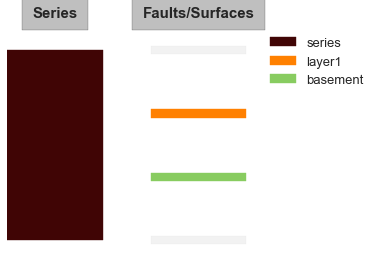

In [4]:
%matplotlib inline
gp.map_series_to_surfaces(geo_model, {'series':('layer1','basement')})

### 2. Adding topography

#### 2 a. Load from raster file

In [5]:
fp = os.pardir+"/input_data/bogota.tif"

[440720 471440  69280 100000] [512 512]
Cropped raster to geo_model.grid.extent.
[440720 441129  69280  69689] [7 7]
storing converted file...
showing...


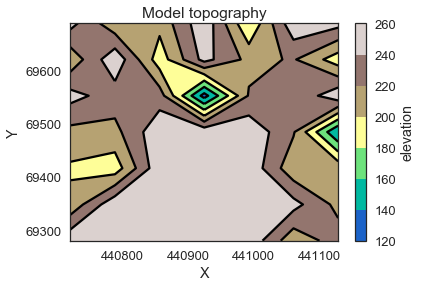

In [6]:
geo_model.add_topography(source='gdal',filepath=fp)

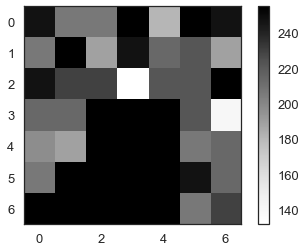

In [7]:
plt.imshow(geo_model.topography.topo.dem_zval)
plt.colorbar()

In [8]:
geo_model.topography._line_in_section()

Gefahr weil resolution


array([[69309,   255],
       [69367,   206],
       [69426,   197],
       [69484,   214],
       [69542,   247],
       [69601,   206],
       [69659,   247]])

In [9]:
geo_model.topography.topo.dem_zval.max(),geo_model.topography.topo.dem_zval.min()

(255, 132)

#### 2.b create fun topography

showing...


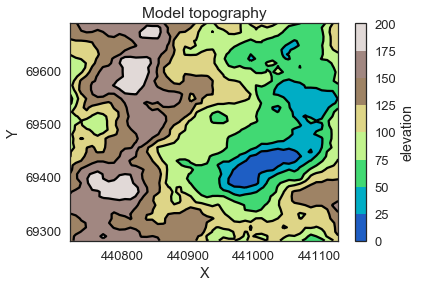

In [10]:
geo_model.add_topography(d_z=np.array([0,200]))

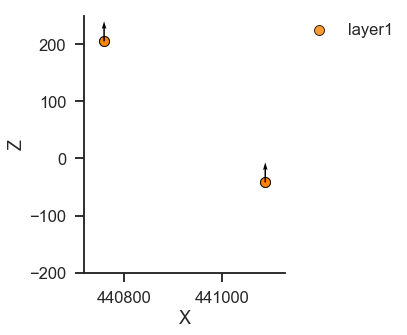

In [11]:
gp.plot.plot_data(geo_model)

In [12]:
gp.set_interpolation_data(geo_model,
                          output='geology', compile_theano=True,
                          theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!


,values
dtype,float64
output,geology
theano_optimizer,fast_compile
device,cpu
verbosity,[]


In [13]:
geo_model.series

,order_series,BottomRelation
series,1,Erosion


In [14]:
geo_model.surfaces.modify_order_surfaces(1,0)

In [15]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,layer1,series,1,False,#ff8000,1
1,basement,series,2,True,#88cc60,2


In [16]:
import copy

In [17]:
old_grid = copy.copy(geo_model.grid)

In [21]:
old_grid.values.shape

(125000, 3)

In [19]:
sol = gp.compute_model_at(old_grid.values,geo_model, compute_mesh=False)

In [21]:
#geo_model.interpolator.set_initial_results_matrices()

In [22]:
geo_model.grid.resolution

array([  0.00000000e+000,               nan,   4.94065646e-324])

In [23]:
sol2 = gp.compute_model_at(geo_model.topography.values, geo_model, compute_mesh=False)

In [24]:
sol2.lith_block.shape

(2500,)

In [25]:
sol2


Lithology ids 
  [ 2.  2.  2. ...,  1.  1.  1.] 

In [20]:
%matplotlib inline
gp.plot.plot_section(geo_model, cell_number=42, block_type='lithology',
                         direction='y', plot_data=True,show_faults=False)

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [ ]:
geo_model.topography._line_in_section()

This is wrong!